In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('student.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
#sum of null values
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [8]:
df.iloc[:,1:].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
#rename columns
df.rename(columns=({'gender':'Gender','race/ethnicity':'Race/Ethnicity'
                     ,'parental level of education':'Parental_Level_of_Education'
                     ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7296\3023325622.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Math_Score'],bins=10,kde=True)


<AxesSubplot: xlabel='Math_Score', ylabel='Density'>

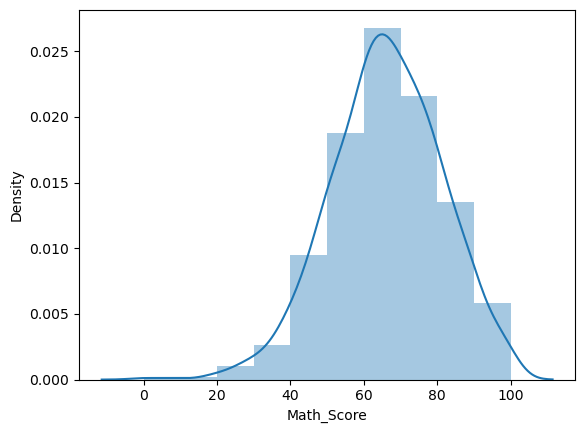

In [11]:
#math score
sns.distplot(df['Math_Score'],bins=10,kde=True)



In [12]:
#how many students passed in math
df['Math_PassStatus'] = np.where(df['Math_Score']<40,'F','P')
df.Math_PassStatus.value_counts()


P    960
F     40
Name: Math_PassStatus, dtype: int64

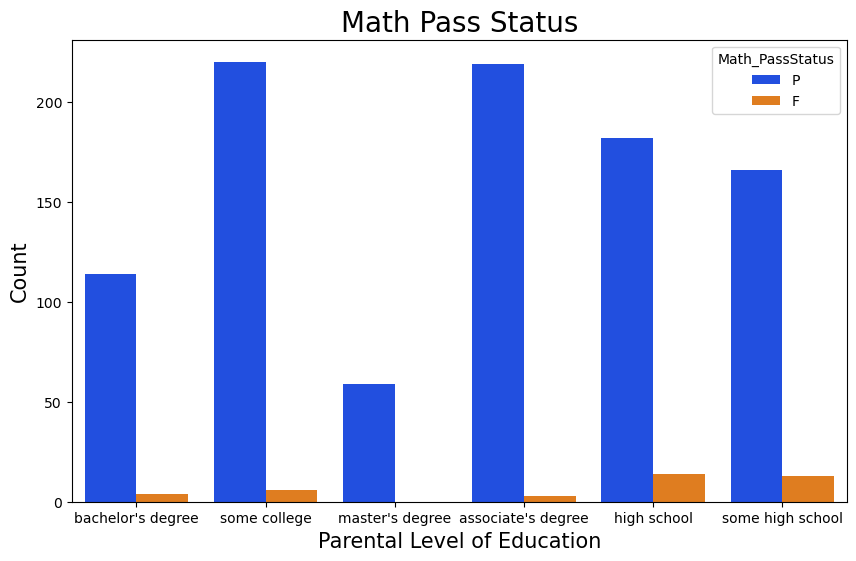

In [13]:
#plot math pass status
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Math_PassStatus',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Math Pass Status',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7296\84969279.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Reading_Score'],bins=10,kde=True)


<AxesSubplot: xlabel='Reading_Score', ylabel='Density'>

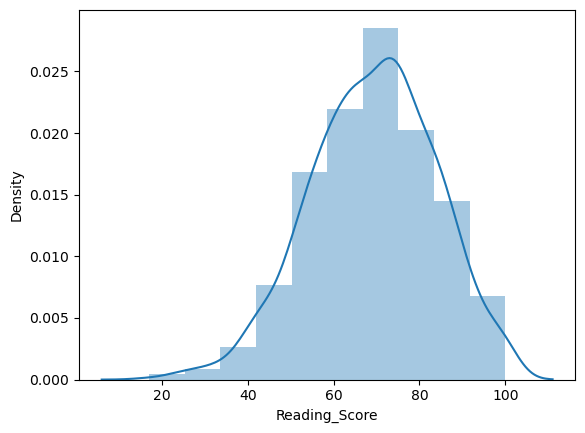

In [14]:
#reading score
sns.distplot(df['Reading_Score'],bins=10,kde=True)


In [15]:
#how many students passed in reading
df['Reading_PassStatus'] = np.where(df['Reading_Score']<40,'F','P')
df.Reading_PassStatus.value_counts()


P    974
F     26
Name: Reading_PassStatus, dtype: int64

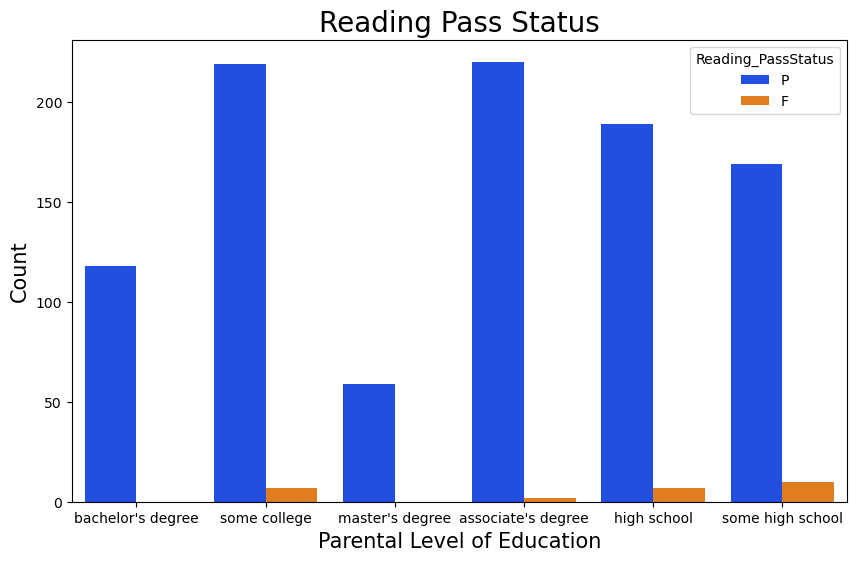

In [16]:
#plot reading pass status
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Reading_PassStatus',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Reading Pass Status',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7296\543455210.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Writing_Score'],bins=10,kde=True)


<AxesSubplot: xlabel='Writing_Score', ylabel='Density'>

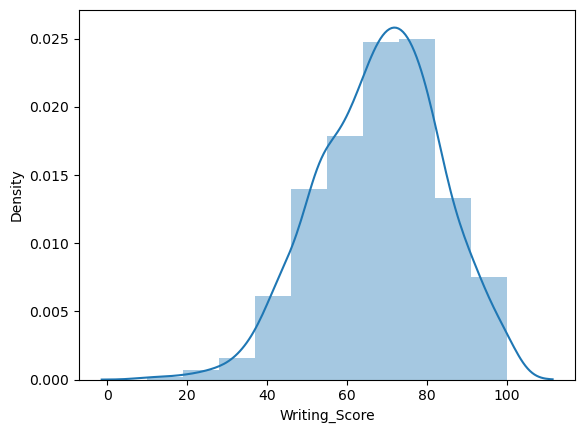

In [17]:
#writing score
sns.distplot(df['Writing_Score'],bins=10,kde=True)


In [18]:
#how many students passed in writing
df['Writing_PassStatus'] = np.where(df['Writing_Score']<40,'F','P')
df.Writing_PassStatus.value_counts()


P    968
F     32
Name: Writing_PassStatus, dtype: int64

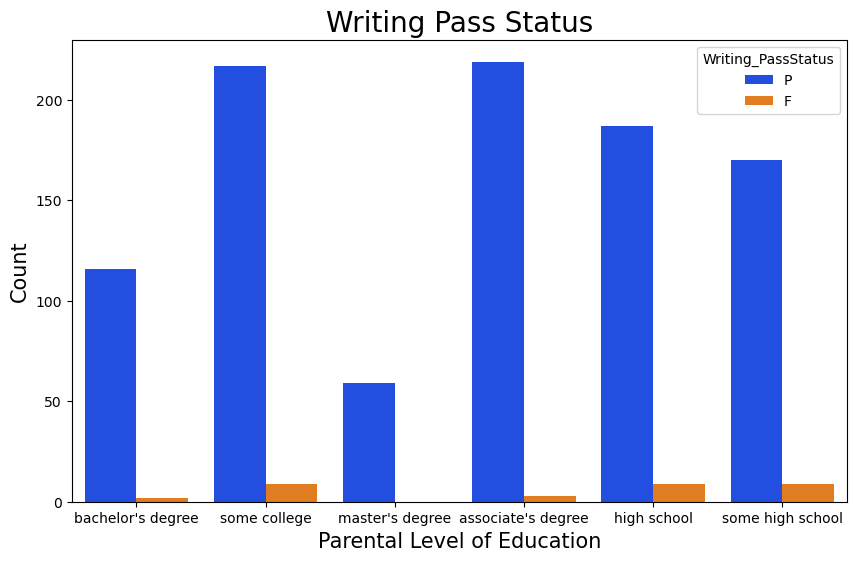

In [19]:
#plot writing pass status
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Writing_PassStatus',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Writing Pass Status',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7296\616334804.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Score'],bins=10,kde=True)


<AxesSubplot: xlabel='Total_Score', ylabel='Density'>

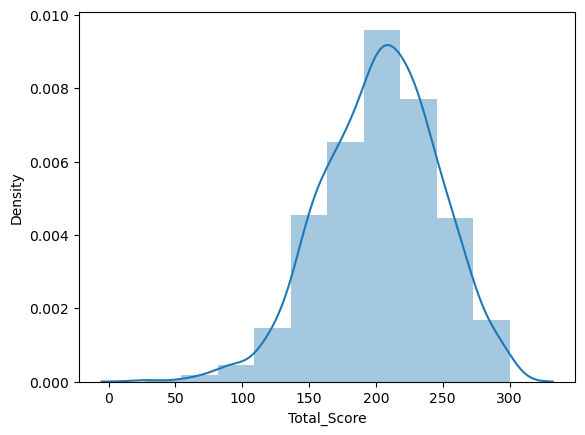

In [20]:
#overall score
df['Total_Score'] = df['Math_Score']+df['Reading_Score']+df['Writing_Score']
sns.distplot(df['Total_Score'],bins=10,kde=True)


In [21]:
#how many students passed in overall
df['Overall_PassStatus'] = np.where(df['Total_Score']<120,'F','P')
df.Overall_PassStatus.value_counts()


P    970
F     30
Name: Overall_PassStatus, dtype: int64

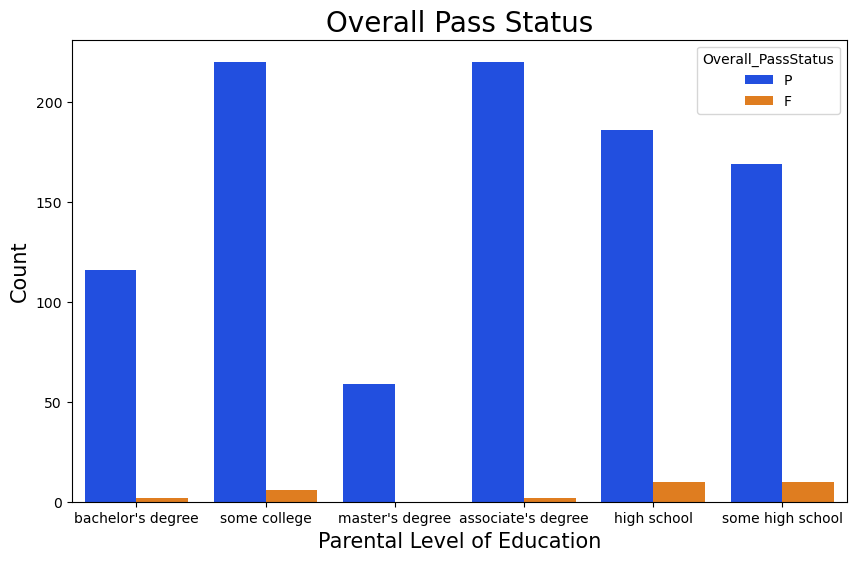

In [22]:
#plot overall pass status
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Overall_PassStatus',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Overall Pass Status',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


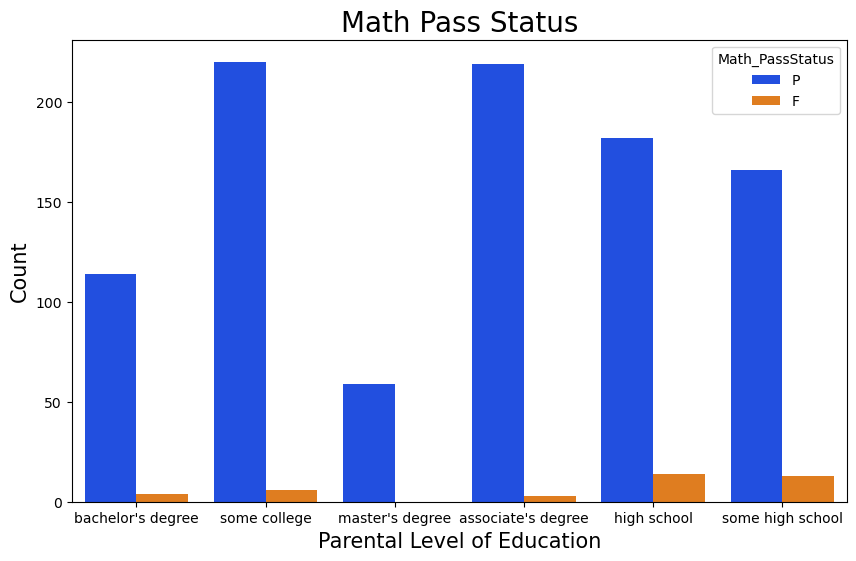

In [23]:
#plotting math pass status
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Math_PassStatus',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Math Pass Status',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


In [24]:
#percentage of marks
df['Math_Percentage'] = df['Math_Score']/100
df['Reading_Percentage'] = df['Reading_Score']/100
df['Writing_Percentage'] = df['Writing_Score']/100
df['Total_Percentage'] = df['Total_Score']/300


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7296\2463089579.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Percentage'],bins=10,kde=True)


<AxesSubplot: xlabel='Total_Percentage', ylabel='Density'>

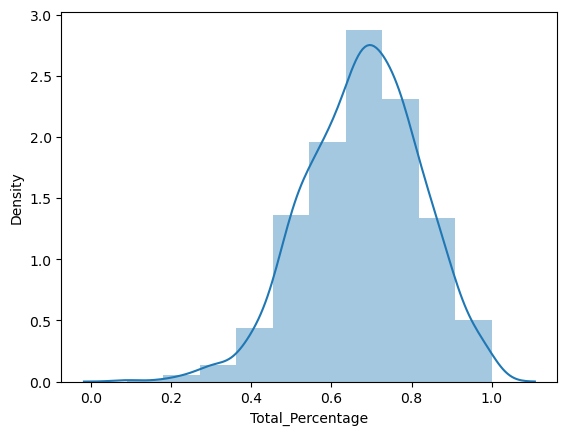

In [25]:
#plotting all marks percentage
sns.distplot(df['Total_Percentage'],bins=10,kde=True)


In [26]:
#assigning grades
def GetGrade(Percentage,Overall_PassStatus):
    if(Overall_PassStatus=='F'):
        return 'F'
    if(Percentage>=0.9):
        return 'A'
    if(Percentage>=0.8):
        return 'B'
    if(Percentage>=0.7):
        return 'C'
    if(Percentage>=0.6):
        return 'D'
    if(Percentage>=0.5):
        return 'E'
    else:
        return 'F'
    
df['Grade'] = df.apply(lambda x : GetGrade(x['Total_Percentage'],x['Overall_PassStatus']),axis=1)
df.Grade.value_counts()

C    261
D    256
E    182
B    146
F    103
A     52
Name: Grade, dtype: int64

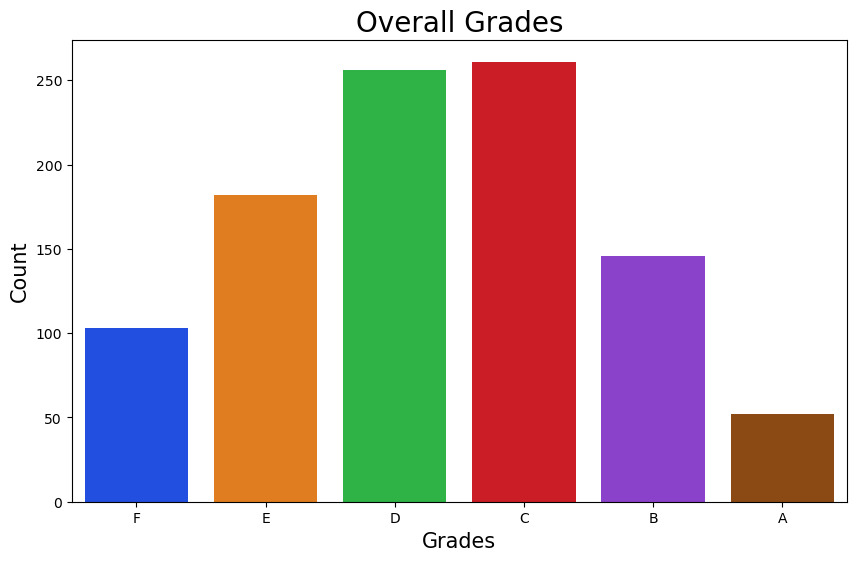

In [27]:
#plotting grades in order from lowest to highest
sns.countplot(x='Grade',data=df,order=['F','E','D','C','B','A'],palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Overall Grades',fontsize=20)
plt.xlabel('Grades',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


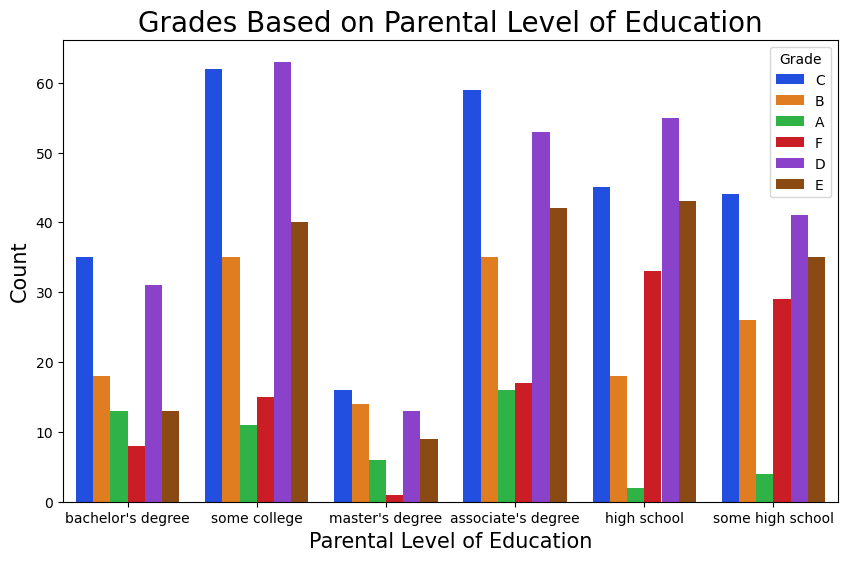

In [28]:
#plotting grades based on parental level of education
sns.countplot(x='Parental_Level_of_Education',data=df,hue='Grade',palette='bright')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Grades Based on Parental Level of Education',fontsize=20)
plt.xlabel('Parental Level of Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


In [29]:
df.columns

Index(['Gender', 'Race/Ethnicity', 'Parental_Level_of_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score', 'Math_PassStatus', 'Reading_PassStatus',
       'Writing_PassStatus', 'Total_Score', 'Overall_PassStatus',
       'Math_Percentage', 'Reading_Percentage', 'Writing_Percentage',
       'Total_Percentage', 'Grade'],
      dtype='object')

In [30]:
#showing values of test preparation course
df['Test_Preparation_Course'].value_counts()

none         642
completed    358
Name: Test_Preparation_Course, dtype: int64

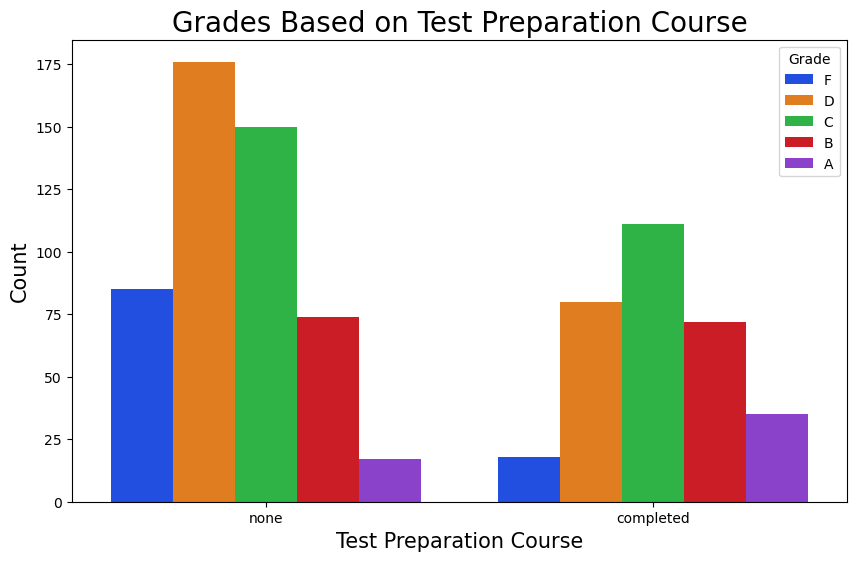

In [31]:
# Specify the order of grades from F to A
grade_order = ['F', 'D', 'C', 'B', 'A']

# Plot the countplot with specified order
sns.countplot(x='Test_Preparation_Course', data=df, hue='Grade',
              order=['none', 'completed'], hue_order=grade_order, palette='bright')

# Adjust the figure size and add labels
plt.gcf().set_size_inches(10, 6)
plt.title('Grades Based on Test Preparation Course', fontsize=20)
plt.xlabel('Test Preparation Course', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

In [32]:
#showing values of gender
df['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

Text(0, 0.5, 'Count')

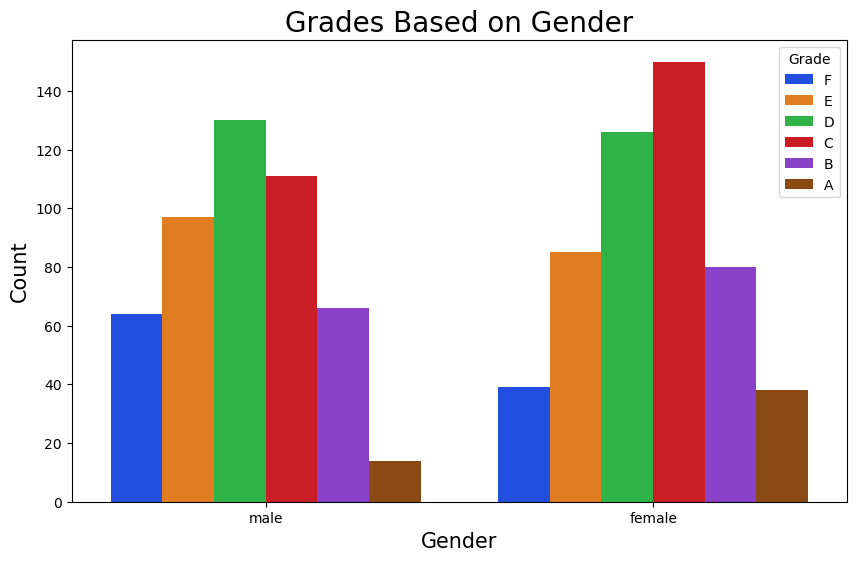

In [33]:
# Specify the order of grades from F to A
grade_order = ['F', 'E', 'D', 'C', 'B', 'A']

# Plot the countplot with specified order
sns.countplot(x='Gender', data=df, hue='Grade',
              order=['male', 'female'], hue_order=grade_order, palette='bright')

# Adjust the figure size and add labels
plt.gcf().set_size_inches(10, 6)
plt.title('Grades Based on Gender', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [34]:
#modeling
#drop columns after making a copy of df
df_model = df.copy()
df_model.drop(['Math_PassStatus','Reading_PassStatus','Writing_PassStatus','Overall_PassStatus'],axis=1,inplace=True)
df_model.columns

Index(['Gender', 'Race/Ethnicity', 'Parental_Level_of_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score', 'Total_Score', 'Math_Percentage', 'Reading_Percentage',
       'Writing_Percentage', 'Total_Percentage', 'Grade'],
      dtype='object')

In [35]:
#set grade as target variable before one hot encoding
target_variable = df_model['Grade']
df_model.drop(['Grade'],axis=1,inplace=True)


In [36]:
grade_mapping = {'F': 1, "E": 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6}
target_variable = target_variable.map(grade_mapping)

In [37]:
#convert categorical variables to dummy variables
df_model = pd.get_dummies(df_model,drop_first=True)
df_model.columns


Index(['Math_Score', 'Reading_Score', 'Writing_Score', 'Total_Score',
       'Math_Percentage', 'Reading_Percentage', 'Writing_Percentage',
       'Total_Percentage', 'Gender_male', 'Race/Ethnicity_group B',
       'Race/Ethnicity_group C', 'Race/Ethnicity_group D',
       'Race/Ethnicity_group E',
       'Parental_Level_of_Education_bachelor's degree',
       'Parental_Level_of_Education_high school',
       'Parental_Level_of_Education_master's degree',
       'Parental_Level_of_Education_some college',
       'Parental_Level_of_Education_some high school', 'Lunch_standard',
       'Test_Preparation_Course_none'],
      dtype='object')

d:\python\odyn\anak2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.45      0.33      0.38        27
           2       0.33      0.03      0.05        35
           3       0.22      0.35      0.27        48
           4       0.33      0.53      0.41        59
           5       0.33      0.04      0.07        27
           6       0.00      0.00      0.00         4

    accuracy                           0.29       200
   macro avg       0.28      0.21      0.20       200
weighted avg       0.31      0.29      0.26       200

[[ 9  1 14  3  0  0]
 [ 3  1 17 14  0  0]
 [ 4  1 17 23  0  3]
 [ 2  0 25 31  1  0]
 [ 2  0  5 19  1  0]
 [ 0  0  0  3  1  0]]


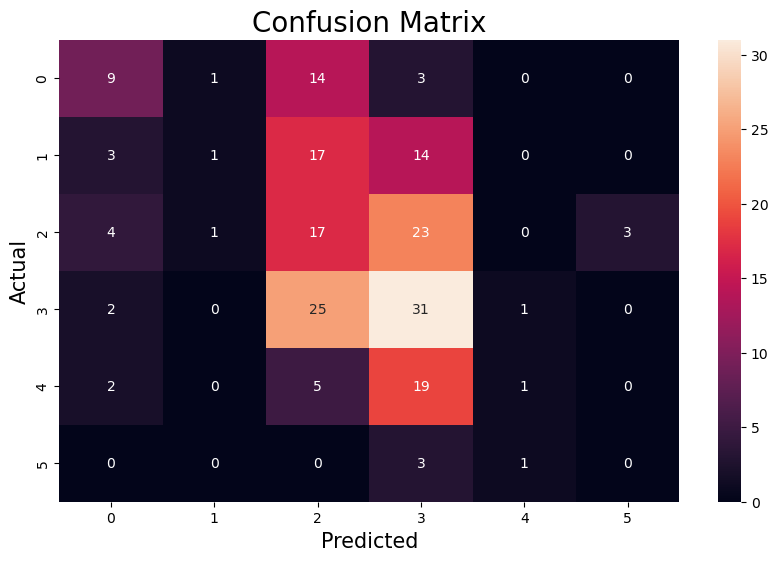

In [38]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#separating independent and dependent variables
X = df_model
y = target_variable
#splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#fitting the model
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
#predicting the values
y_pred = log_reg.predict(X_test)
#accuracy score
accuracy_score(y_test,y_pred)
#classification report
print(classification_report(y_test,y_pred))
#confusion matrix
print(confusion_matrix(y_test,y_pred))
#plotting confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
#make it bigger
plt.gcf().set_size_inches(10,6)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.show()


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [40]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 0.18338385297445947
Mean Absolute Error (MAE): 0.29678075114692687
R-squared Score: 0.8919746389170243

Results for Decision Tree:
Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared Score: 1.0

Results for Random Forest:
Mean Squared Error (MSE): 8.69999999999998e-05
Mean Absolute Error (MAE): 0.0011999999999999988
R-squared Score: 0.9999487511781339

Results for SVR:
Mean Squared Error (MSE): 0.08432599651954298
Mean Absolute Error (MAE): 0.2482495888499857
R-squared Score: 0.9503263451227951

Results for XGBoost:
Mean Squared Error (MSE): 2.0003128042844764e-09
Mean Absolute Error (MAE): 2.7397871017456056e-05
R-squared Score: 0.9999999988216819

Results for LightGBM:
Mean Squared Error (MSE): 0.0018472886228015606
Mean Absolute Error (MAE): 0.0050925444956708135
R-squared Score: 0.9989118233843063

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 1.2195861713202779e-09
Mean Absolute Error 

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Results for Linear SVR:
Mean Squared Error (MSE): 0.2882654520963509
Mean Absolute Error (MAE): 0.4242414213301753
R-squared Score: 0.8301923585671825

Learning rate set to 0.039525
0:	learn: 1.3036439	total: 137ms	remaining: 2m 16s
1:	learn: 1.2631134	total: 138ms	remaining: 1m 8s
2:	learn: 1.2192634	total: 139ms	remaining: 46.3s
3:	learn: 1.1769110	total: 141ms	remaining: 35s
4:	learn: 1.1383993	total: 142ms	remaining: 28.2s
5:	learn: 1.1026755	total: 143ms	remaining: 23.7s
6:	learn: 1.0653546	total: 144ms	remaining: 20.5s
7:	learn: 1.0295573	total: 146ms	remaining: 18s
8:	learn: 0.9949773	total: 147ms	remaining: 16.2s
9:	learn: 0.9616972	total: 148ms	remaining: 14.7s
10:	learn: 0.9304165	total: 149ms	remaining: 13.4s
11:	learn: 0.8980572	total: 150ms	remaining: 12.4s
12:	learn: 0.8683272	total: 151ms	remaining: 11.5s
13:	learn: 0.8387331	total: 153ms	remaining: 10.7s
14:	learn: 0.8126072	total: 154ms	remaining: 10.1s
15:	learn: 0.7872864	total: 155ms	remaining: 9.53s
16:	learn: 0.76

In [41]:
accuracy

[0.8919746389170243,
 1.0,
 0.9999487511781339,
 0.9503263451227951,
 0.9999999988216819,
 0.9989118233843063,
 0.9999999992815821,
 1.0,
 0.9899858623939679,
 0.8301923585671825,
 0.9993672710310326]

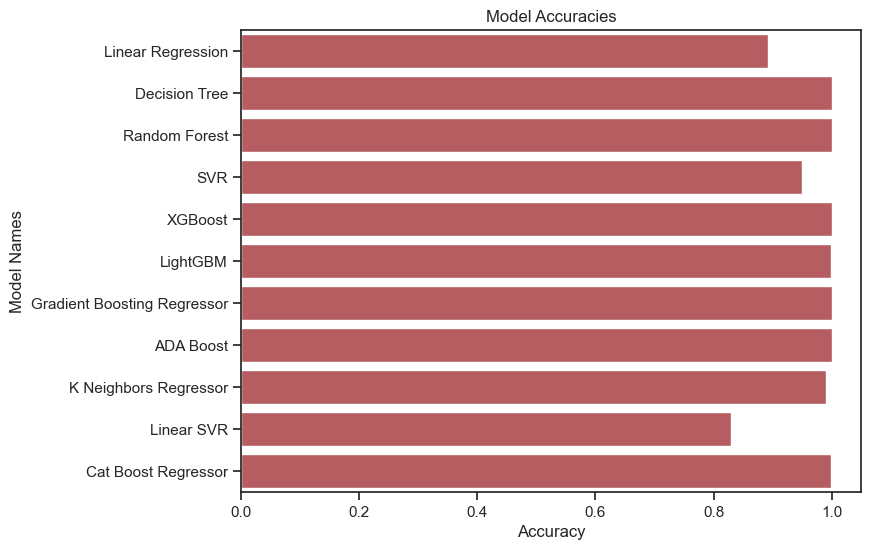

In [42]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

The best value for k neighbors in classification is: 3 with an accuracy of 0.9900


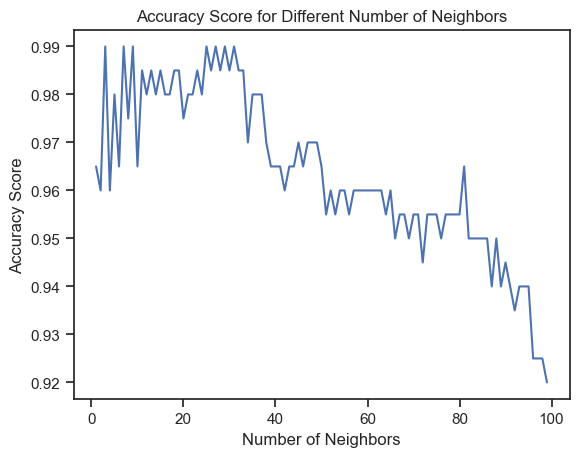

In [43]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in classification is: {best_k} with an accuracy of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Number of Neighbors')
plt.show()


The best value for k neighbors in regression is: 4 with an R-squared score of 0.9910


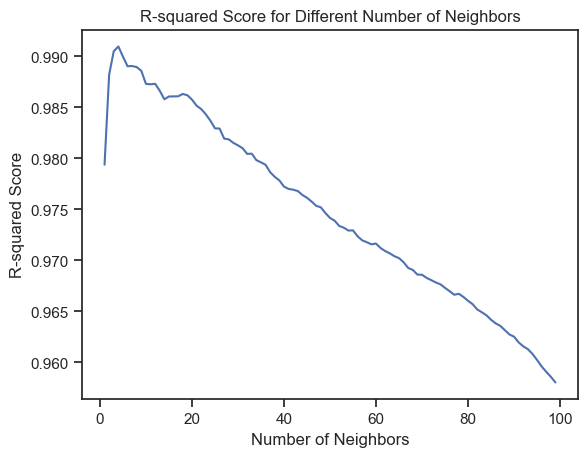

In [44]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in regression is: {best_k} with an R-squared score of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()